Introduction to Computational Physics Midterm

Name: Christopher Morris

Date: May 9, 2019

In [6]:

# Template program for the simple integration scheme

import math, sys
import matplotlib.pyplot as plt
import numpy as np

def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

def acc(k, x, v, t):
    # acceleration
    return -K*math.sinh(x)                   

def potential(k, x):
    # potential: MUST be consistent with acc!
    return K*(math.cosh(x) - 1)                  

def energy(k, x, v):
    return potential(k, x) + 0.5*v*v

def output(K, x, v, t, E0):
    pass
    #print (t, x, v, energy(K, x,v) - E0)

def take_a_step(k, x, v, t, dt):
    # Set the acceleration.
    a = acc(k, x, v, t)

    # Take the step.
    xp = x
    x += v*dt + 0.5*a*dt*dt
    v += a*dt
    
    af = acc(k, x, v, t+dt)
    xf = x + v*dt + .5*a*dt*dt
    
    return x, xp, xf, v

def find_zero(x, xp):
    if (xp < 0) and (x >= 0):
        zeros_list.append(interp(t-dt, xp, t, x, y=0))
        zeros.append(0)
    if (xp > 0) and (x <= 0):
        zeros_list.append(interp(t-dt, xp, t, x, y=0))
        zeros.append(0)

def check_max(xp, x, xf, t):
    if (xp < x) and (xf <= x):
        max_list.append(x)
        max_time_list.append(t)

    

# Declaration and initialization.

K  = 4
t  = 0.0
x  = 0
xp = x
v  = 2
dt = .01
tmax = 1.473173473356929

zeros_list = [0]
zeros = [0]

max_list = []
max_time_list = []

numerical_list = [0]
time_list = [0]

E0 = energy(K, x, v)
output(K, x, v, t, E0)

# Integrate the motion to the specified time.
E0 = energy(K, x, v)
dEmax = 0
while (t < tmax + dt):
    x, xp, xf, v = take_a_step(K, x, v, t, dt)
    
    numerical_list.append(x)
    time_list.append(t)
    
    find_zero(x, xp)
    check_max(xp, x, xf, t)
    
    dE = abs(energy(K, x, v) - E0)
    if dE > dEmax:
        dEmax = dE

    t += dt
    #x += dx
    output(K, x, v, t, E0)  
    

    

1) T for the first returning zero is t = 1.473173473356929
First max within the interval 0<t<T is x = 0.9700858029678198


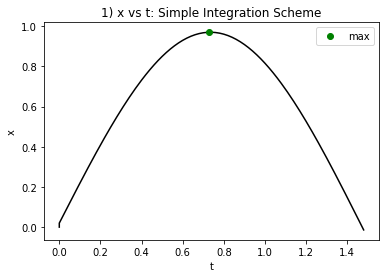

In [7]:
print('1) T for the first returning zero is t = {}'.format(tmax))
print('First max within the interval 0<t<T is x = {}'.format(max_list[0]))
plt.plot(time_list, numerical_list, 'k-')
plt.plot(max_time_list, max_list, 'go', label = 'max')
plt.title('1) x vs t: Simple Integration Scheme')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.legend(bbox_to_anchor=(1,1))

In [8]:
dEmax = 1
dt = .01
while (dEmax >= 1e-4):
    K  = 4
    t  = 0.0
    x  = 0
    xp = x
    v  = 2
    tmax = 1.473173473356929

    zeros_list = [0]
    zeros = [0]

    max_list = []
    max_time_list = []

    numerical_list = [0]
    time_list = [0]

    E0 = energy(K, x, v)
    output(K, x, v, t, E0)

    # Integrate the motion to the specified time.
    E0 = energy(K, x, v)
    dEmax = 0
    while (t < tmax + dt):
        x, xp, xf, v = take_a_step(K, x, v, t, dt)

        numerical_list.append(x)
        time_list.append(t)

        find_zero(x, xp)
        check_max(xp, x, xf, t)

        dE = abs(energy(K, x, v) - E0)
        if dE > dEmax:
            dEmax = dE

        t += dt
    print('Max energy error: {:.4f}    dt = {}'.format(dEmax, dt))
    dt /= 2
    
print('2) Optimal dt = {}'.format(dt*2))

Max energy error: 0.0703    dt = 0.01
Max energy error: 0.0344    dt = 0.005
Max energy error: 0.0171    dt = 0.0025
Max energy error: 0.0085    dt = 0.00125
Max energy error: 0.0042    dt = 0.000625
Max energy error: 0.0021    dt = 0.0003125
Max energy error: 0.0011    dt = 0.00015625
Max energy error: 0.0005    dt = 7.8125e-05
Max energy error: 0.0003    dt = 3.90625e-05
Max energy error: 0.0001    dt = 1.953125e-05
Max energy error: 0.0001    dt = 9.765625e-06
2) Optimal dt = 9.765625e-06


In [9]:
def check_intersection(x1, x2, t):
    if abs(x1 - x2) <= .00006: #Picked this value because anylower and the points weren't found intersecting
        intersection_x.append((x1+x2)/2) #Used Midpoint to make the answer more exact
        intersection_t.append(t)

        
# Declaration and initialization.

K  = 4
t  = 0.0
x1 = 0
x2 = 0
v1 = 5
v2 = -3
dt = 9.765625e-06
tmax = 1.473173473356929

zeros_list = [0]
zeros = [0]

max_list = []
max_time_list = []

numerical_list_x1 = [0]
numerical_list_x2 = [0]

time_list = [0]

intersection_x = []
intersection_t = []

E0 = energy(K, x, v)
output(K, x, v, t, E0)

# Integrate the motion to the specified time.
E0 = energy(K, x, v)
dEmax = 0
while (t < tmax + dt):
    x1, xp, xf, v1 = take_a_step(K, x1, v1, t, dt)
    x2, xp, xf, v2 = take_a_step(K, x2, v2, t, dt)
    
    numerical_list_x1.append(x1)
    numerical_list_x2.append(x2)
    
    check_intersection(x1, x2, t)
    
    time_list.append(t)
    t += dt
    
    



3) The particles intersect at approx. x = -0.32806313933099385 at t = 1.290351562498968


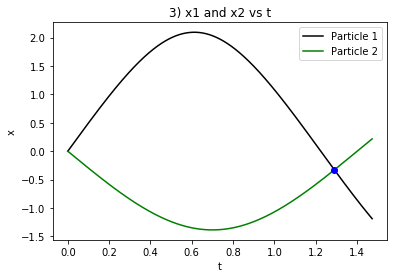

In [10]:
print('3) The particles intersect at approx. x = {} at t = {}'.format(intersection_x[1], intersection_t[1]))
plt.plot(time_list, numerical_list_x1, 'k-', label = 'Particle 1')
plt.plot(time_list, numerical_list_x2, 'g-', label = 'Particle 2')
plt.plot(intersection_t[1], intersection_x[1], 'bo')
plt.title('3) x1 and x2 vs t')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.legend(bbox_to_anchor=(1,1))